# Data Exploration
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Summary

A notebook doing some primary data exploration before creating any sentiment analysis models or splits. Our goals with this are:
1. Initial look at the data
2. Gain a better sense of feature distribution.
3. Exploration the token distribution.
4. Examine the types of paintings featured in the dataset.
---
## Necessary Imports & Settings

In [1]:
from itertools import chain
from nltk import FreqDist
from nltk.corpus import words

import emoji
import nltk
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

Pretty printing has been turned OFF


---
## Globals

In [3]:
DATAPATH = "../data/"
DATA = "artemis_dataset_release_v0.csv"
IMAGES = ""
SEED = 42

---
## Useful Functions

In [4]:
def load_dataset() -> pd.DataFrame:
    return pd.read_csv(DATAPATH + DATA)


def countplot(df: pd.DataFrame, x: str) -> plt.axes:

    name = x.replace('_', ' ').title()
    ordering = df[x].value_counts().index

    plot = sns.countplot(data=df, x=x, hue=x, stat="percent", 
                         order=ordering, hue_order=ordering)
    plot.tick_params(axis="x", rotation=90)
    plot.set_title(f"{name} Percentages")
    plot.set_ylabel("Percentage")
    plot.set_xlabel(name)

    return plot

---
## Initial Look

In [5]:
art_df = load_dataset()

In [6]:
art_df.sample(10, random_state=SEED)

,art_style,painting,emotion,utterance,repetition
390761,Symbolism,william-blake_night-startled-by-the-lark-1820,excitement,the angel will fly around in the starry sky,5
184596,Minimalism,robert-mangold_untitled-from-skowhegan-suite-1992,something else,This image makes me feel interested because th...,5
354890,Impressionism,konstantin-korovin_in-a-room-1886,sadness,The man in the bed looks as if he could be pot...,5
406686,Realism,vasily-surikov_whacky-seated-on-the-ground-stu...,contentment,"The person sitting has his hand up, looks like...",5
404565,Realism,viktor-vasnetsov_edge-of-the-spruce-forest-1881,fear,The trees look so close together and a good hi...,5
191273,Impressionism,claude-monet_chrysanthemums-1897,something else,Although I enjoy the depth of the colors every...,6
274406,Art_Nouveau_Modern,raphael-kirchner_fanny-brice-1916-1,disgust,Everything seems to be painted in almost the s...,5
54329,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-...,contentment,the blue waters give this a tranquil feel,5
256850,Baroque,rembrandt_a-woman-weeping,sadness,The lady appears to be crying and attempting t...,5
101958,High_Renaissance,andrea-solario_st-catherine,sadness,the people in the picture look sad,5


In [7]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454684 entries, 0 to 454683
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   art_style   454684 non-null  object
 1   painting    454684 non-null  object
 2   emotion     454684 non-null  object
 3   utterance   454684 non-null  object
 4   repetition  454684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 17.3+ MB


In [8]:
# Let's separate the artists and years out
ARTIST = re.compile(r'(.+)_')

art_df["artist"] = art_df.painting.map(lambda x: ARTIST.findall(x)[0])

art_df.sample(10, random_state=SEED)

,art_style,painting,emotion,utterance,repetition,artist
390761,Symbolism,william-blake_night-startled-by-the-lark-1820,excitement,the angel will fly around in the starry sky,5,william-blake
184596,Minimalism,robert-mangold_untitled-from-skowhegan-suite-1992,something else,This image makes me feel interested because th...,5,robert-mangold
354890,Impressionism,konstantin-korovin_in-a-room-1886,sadness,The man in the bed looks as if he could be pot...,5,konstantin-korovin
406686,Realism,vasily-surikov_whacky-seated-on-the-ground-stu...,contentment,"The person sitting has his hand up, looks like...",5,vasily-surikov
404565,Realism,viktor-vasnetsov_edge-of-the-spruce-forest-1881,fear,The trees look so close together and a good hi...,5,viktor-vasnetsov
191273,Impressionism,claude-monet_chrysanthemums-1897,something else,Although I enjoy the depth of the colors every...,6,claude-monet
274406,Art_Nouveau_Modern,raphael-kirchner_fanny-brice-1916-1,disgust,Everything seems to be painted in almost the s...,5,raphael-kirchner
54329,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-...,contentment,the blue waters give this a tranquil feel,5,utagawa-toyokuni-ii
256850,Baroque,rembrandt_a-woman-weeping,sadness,The lady appears to be crying and attempting t...,5,rembrandt
101958,High_Renaissance,andrea-solario_st-catherine,sadness,the people in the picture look sad,5,andrea-solario


In [9]:
YEAR = re.compile(r'.*-(\d{4})')

def year(x):

    y = YEAR.findall(x)

    return y[0] if y else pd.NA

art_df["year"] = art_df.painting.map(lambda x: year(x))

art_df.sample(10, random_state=SEED)

,art_style,painting,emotion,utterance,repetition,artist,year
390761,Symbolism,william-blake_night-startled-by-the-lark-1820,excitement,the angel will fly around in the starry sky,5,william-blake,1820
184596,Minimalism,robert-mangold_untitled-from-skowhegan-suite-1992,something else,This image makes me feel interested because th...,5,robert-mangold,1992
354890,Impressionism,konstantin-korovin_in-a-room-1886,sadness,The man in the bed looks as if he could be pot...,5,konstantin-korovin,1886
406686,Realism,vasily-surikov_whacky-seated-on-the-ground-stu...,contentment,"The person sitting has his hand up, looks like...",5,vasily-surikov,<NA>
404565,Realism,viktor-vasnetsov_edge-of-the-spruce-forest-1881,fear,The trees look so close together and a good hi...,5,viktor-vasnetsov,1881
191273,Impressionism,claude-monet_chrysanthemums-1897,something else,Although I enjoy the depth of the colors every...,6,claude-monet,1897
274406,Art_Nouveau_Modern,raphael-kirchner_fanny-brice-1916-1,disgust,Everything seems to be painted in almost the s...,5,raphael-kirchner,1916
54329,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-...,contentment,the blue waters give this a tranquil feel,5,utagawa-toyokuni-ii,<NA>
256850,Baroque,rembrandt_a-woman-weeping,sadness,The lady appears to be crying and attempting t...,5,rembrandt,<NA>
101958,High_Renaissance,andrea-solario_st-catherine,sadness,the people in the picture look sad,5,andrea-solario,<NA>


In [10]:
print(f"There are {len(art_df.year[art_df.year.isna()])} paintins with no year.")

There are 186621 paintins with no year.


In [11]:
# Let's see the unique values
print("Unique paintings:", len(art_df.painting.unique()))
print("Unique art styles:", len(art_df.art_style.unique()))
print("Unique emotions:", len(art_df.emotion.unique()))
print("Unique utterances:", len(art_df.utterance.unique()))
print("Unique artists:", len(art_df.artist.unique()))
print("Unique years:", len(art_df.year.unique()))
print("Unique repetition counts:", len(art_df.repetition.unique()))

Unique paintings: 80031
Unique art styles: 27
Unique emotions: 9
Unique utterances: 453855
Unique artists: 1178
Unique years: 620
Unique repetition counts: 27


In [12]:
# Sort by art style then emotion then artist for future reference
art_df = art_df.sort_values(by=["art_style", "emotion", "artist"])
art_df.head(5)

,art_style,painting,emotion,utterance,repetition,artist,year
108513,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,amusement,looks like an old sign so i do not consider th...,5,aaron-siskind,1951
108566,Abstract_Expressionism,aaron-siskind_acolman-1-1955,amusement,interesting to figure out how specific those s...,5,aaron-siskind,1955
108630,Abstract_Expressionism,aaron-siskind_per-400-1983,amusement,It looks like there could be a bird walking up...,5,aaron-siskind,1983
108748,Abstract_Expressionism,aaron-siskind_uruapan-11-1955,amusement,The hay bales,5,aaron-siskind,1955
108846,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,The cheetah print is very mesmerizing and plea...,5,abidin-dino,<NA>


In [13]:
# When we are examining painting properties (repetitons)
mod_df = art_df.drop_duplicates(subset=["painting"], ignore_index=True).copy()
len(mod_df.painting.unique())

80031

In [14]:
# Keep emotion data
emo_df = art_df.groupby(["painting"]).emotion.unique()
emo_df.at["a.y.-jackson_algoma-in-november-1935"]

def to_emotions(x):
    return emo_df.at[x]

mod_df["emotions"] = mod_df.painting.map(to_emotions)
mod_df["length"] = mod_df.emotions.map(len)
mod_df.head()

,art_style,painting,emotion,utterance,repetition,artist,year,emotions,length
0,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,amusement,looks like an old sign so i do not consider th...,5,aaron-siskind,1951,"[amusement, disgust, something else]",3
1,Abstract_Expressionism,aaron-siskind_acolman-1-1955,amusement,interesting to figure out how specific those s...,5,aaron-siskind,1955,"[amusement, contentment, fear, something else]",4
2,Abstract_Expressionism,aaron-siskind_per-400-1983,amusement,It looks like there could be a bird walking up...,5,aaron-siskind,1983,"[amusement, fear, something else]",3
3,Abstract_Expressionism,aaron-siskind_uruapan-11-1955,amusement,The hay bales,5,aaron-siskind,1955,"[amusement, anger, sadness, something else]",4
4,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,The cheetah print is very mesmerizing and plea...,5,abidin-dino,<NA>,"[amusement, contentment, disgust, something else]",4


---
## Analyze Feature Distributions

### Art Style

<Axes: title={'center': 'Art Style Percentages'}, xlabel='Art Style', ylabel='Percentage'>

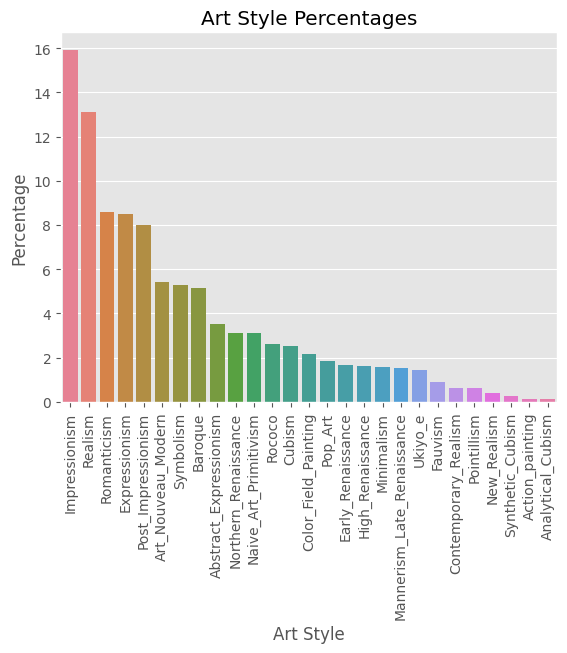

In [15]:
# Let's start graphing
# TODO: Order if put in a paper, kept this way for grid consistency (can't see what the x values are there)
countplot(art_df, "art_style")

/home/computer_cat/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#e24a33'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/computer_cat/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#e24a33'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/computer_cat/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#e24a33'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/computer_cat/miniconda3/envs/deep_learning/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting

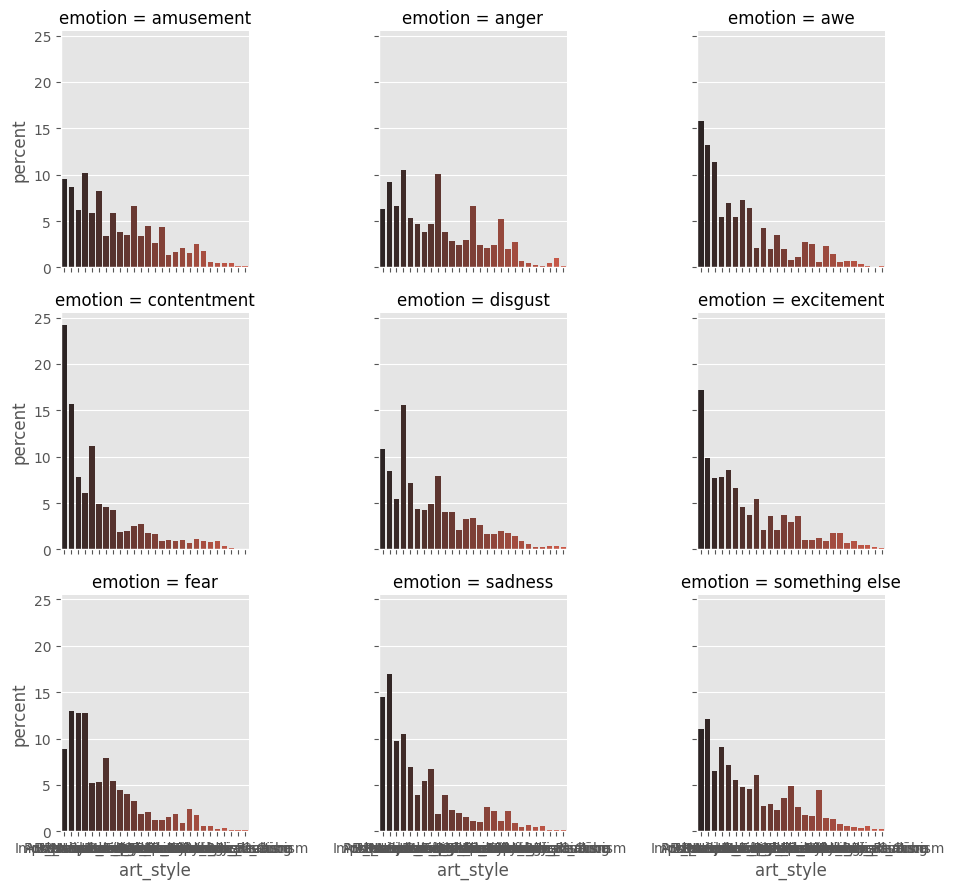

In [16]:
# Ugly, not for the public's eye
ordering = art_df["art_style"].value_counts().index
grid = sns.FacetGrid(data=art_df, col="emotion", col_wrap=3)
grid.map_dataframe(sns.countplot, x="art_style", hue="art_style", stat="percent",
                   order=ordering, hue_order=ordering)
grid.add_legend()

<Axes: title={'center': 'Mean Repetition per Art Style'}, xlabel='art_style'>

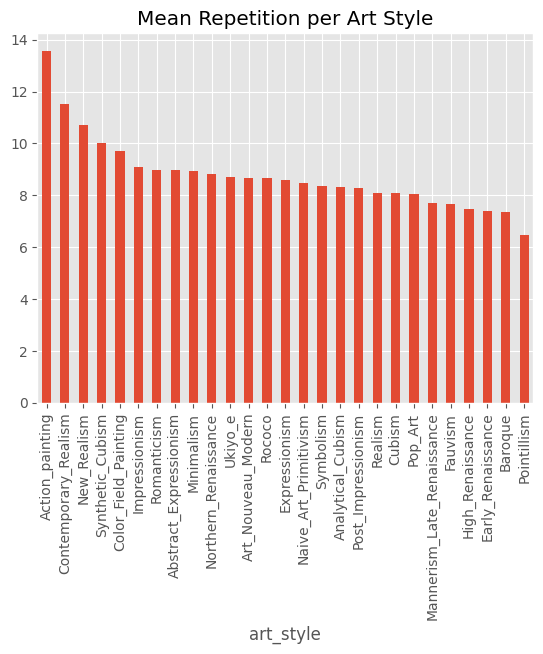

In [17]:
art_df.groupby(["art_style"]).repetition.mean().sort_values(ascending=False).plot(kind="bar", title="Mean Repetition per Art Style")

### Emotion

<Axes: title={'center': 'Emotion Percentages'}, xlabel='Emotion', ylabel='Percentage'>

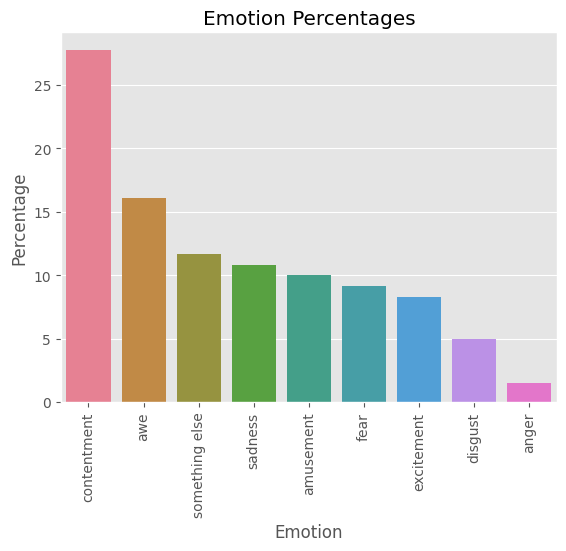

In [18]:
# Let's look at emotion
countplot(art_df, "emotion")

Text(0.5, 0, 'Emotion')

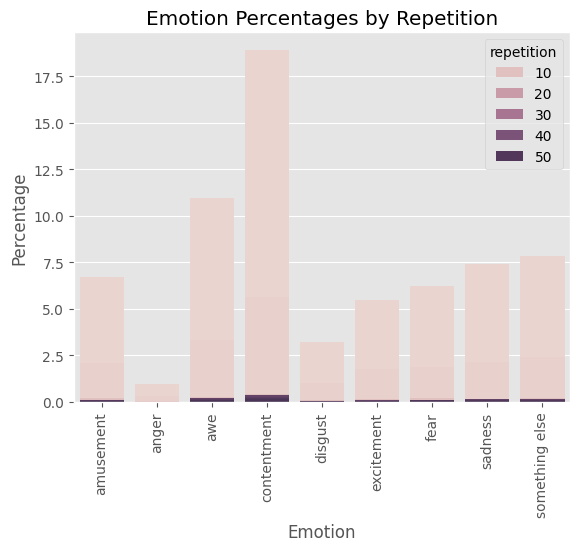

In [19]:
# TODO: This is weird... Why is it only hueing these values?
plot = sns.countplot(data=art_df, x="emotion", hue="repetition", dodge=False, stat="percent")
plot.set_title("Emotion Percentages by Repetition")
plot.tick_params(axis="x", rotation=90)
plot.set_ylabel("Percentage")
plot.set_xlabel("Emotion")


### Paintings

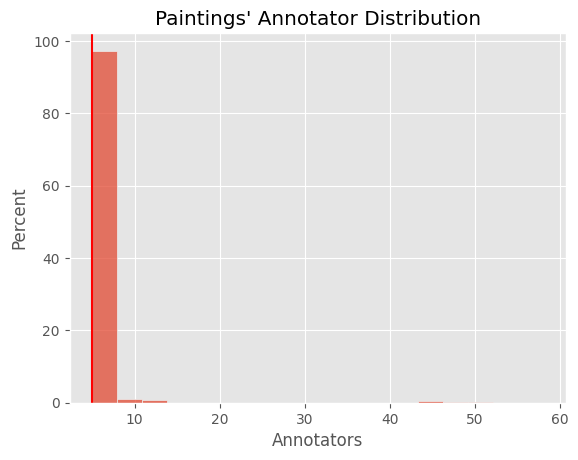

In [20]:
# Repetition distribution
plot = sns.histplot(data=mod_df, x="repetition", stat="percent")
plot.set_title("Paintings' Annotator Distribution")
plot.set_ylabel("Percent")
plot.set_xlabel("Annotators")
plot.axvline(x=mod_df.repetition.median(), color="red")

Text(0.5, 0, 'Paintings')

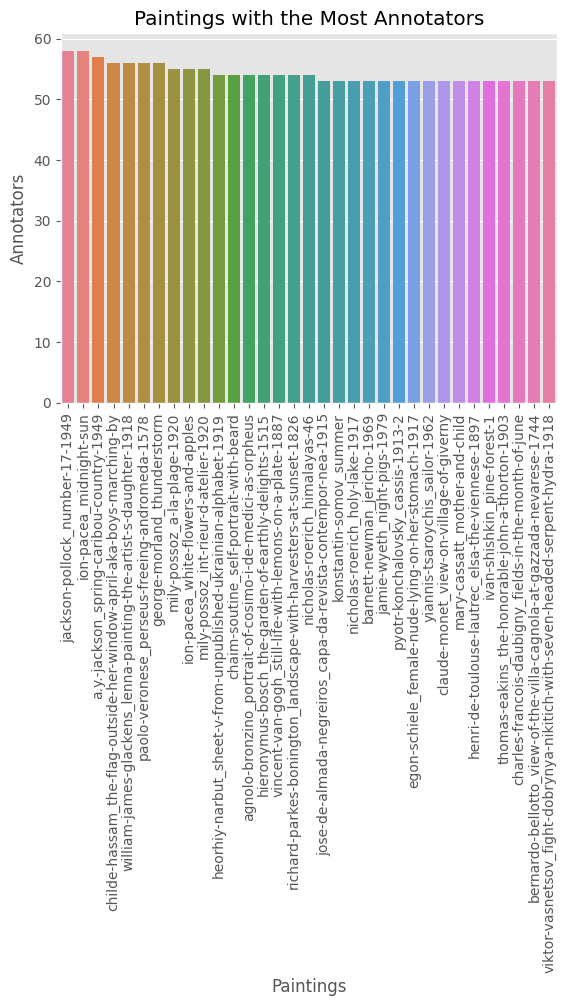

In [21]:
# Which paintings have the most repetitions
plot = sns.barplot(data=mod_df.nlargest(20, "repetition", "all"), x="painting", y="repetition", hue="painting")
plot.set_title("Paintings with the Most Annotators")
plot.tick_params(axis="x", rotation=90)
plot.set_ylabel("Annotators")
plot.set_xlabel("Paintings")

In [22]:
# How many paintings have more than 20 annotators
len(mod_df[mod_df.repetition > 20]) / len(mod_df)

0.00878409616273694

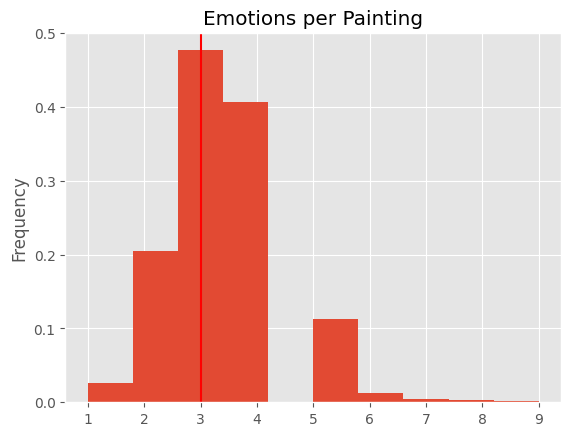

In [23]:
# Let's look at emotion distribution within paintings
art_df.groupby(["painting"]).emotion.unique().map(len).plot(kind="hist", density=1, title="Emotions per Painting")
plt.axvline(x=art_df.groupby(["painting"]).emotion.unique().apply(len).median(), color = "red")

Text(0, 0.5, 'Different Emotions')

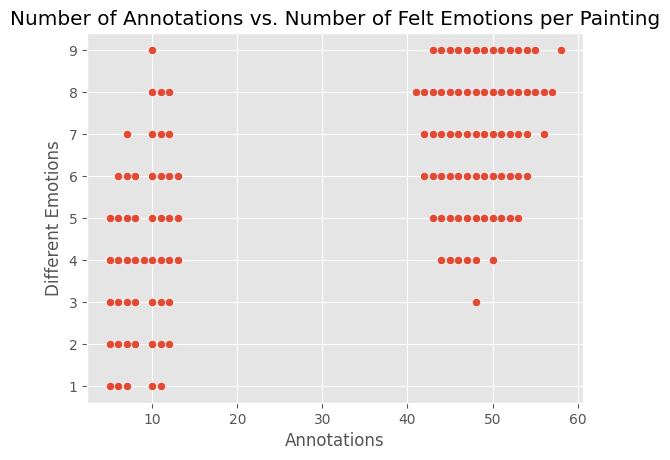

In [24]:
# Number of emotions against the number of annotators per painting
plot = sns.scatterplot(data=mod_df, x="repetition", y="length")
plot.set_title("Number of Annotations vs. Number of Felt Emotions per Painting")
plot.set_xlabel("Annotations")
plot.set_ylabel("Different Emotions")

### Artist Representation

<Axes: xlabel='artist'>

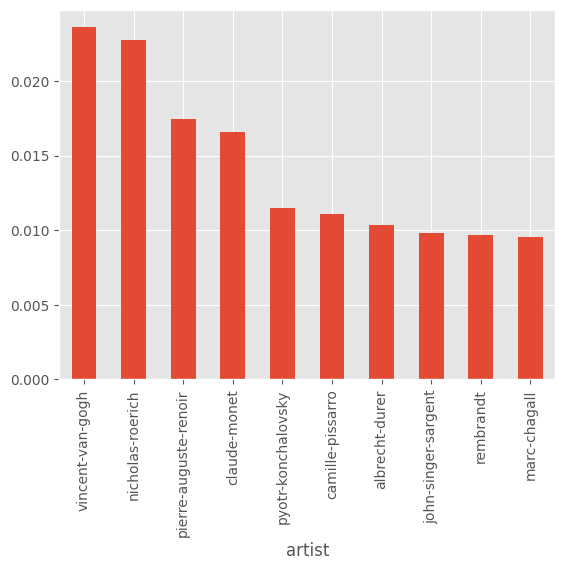

In [25]:
# Popular artists
mod_df.artist.value_counts(normalize=True).nlargest(10, keep="all").plot(kind="bar")

### Conclusions
- Impressionism is the most popular art style in the dataset
    - Associated the most with awe, contentment and excitement, but is popular in a wide array of emotions
- Art style is severely uneven in distribution
- Emotion is uneven with contentment dominating the dataset
- Certain styles have much more annotators than others
- Very few paintings have a lot of annotators
- Less than 0.009% of paintings have more than 20 annotators
- Most paintings have ~3 emotions associated with them
- Potential correlation betweeen number of felt emotions and annotations per painting
---
## Exploration of the Token Distribution

### Basic Clean-Up

In [26]:
# Standardize strings
CLEANUP = re.compile(r'[“”]')
art_df["utterance"] = art_df["utterance"].map(lambda x: CLEANUP.sub('"', x).replace("’", "'").lower().strip())

In [27]:
# Detect... them...
sub_df = art_df[art_df["utterance"].map(lambda x: True if emoji.emoji_count(x) else False)]

In [28]:
# DESTROY THEM!!!
EMOJI = re.compile(r'\:.*\:')
art_df.loc[sub_df.index, "utterance"] = art_df.loc[sub_df.index, "utterance"].map(lambda x: EMOJI.sub('', emoji.demojize(x)))
art_df.loc[sub_df.index]

,art_style,painting,emotion,utterance,repetition,artist,year
280699,Art_Nouveau_Modern,carlos-saenz-de-tejada_illustration-for-the-li...,something else,when you come in contact with the creatures of...,6,carlos-saenz-de-tejada,1957
279034,Expressionism,chaim-soutine_landscape-1,contentment,pictures of small countryside towns make me ha...,5,chaim-soutine,<NA>
77159,Expressionism,ilka-gedo_rose-garden-in-the-wind-1973,contentment,reminds me of a mermaids lagoon,5,ilka-gedo,1973
281642,Post_Impressionism,edouard-vuillard_figures-eating-in-a-garden-by...,contentment,it reminds me of pictures out of victoria maga...,5,edouard-vuillard,<NA>
305521,Realism,vasily-surikov_portrait-of-a-i-yemelyanova-1909,contentment,the amused look on her face is funny and it c...,5,vasily-surikov,1909
226616,Ukiyo_e,hiroshige_benzaiten-shrine-at-inokashira-in-snow,something else,is this snow in japan? i don't recall ever see...,6,hiroshige,<NA>


In [29]:
art_df["tokens"] = art_df.utterance.map(nltk.word_tokenize)
art_df.head()

,art_style,painting,emotion,utterance,repetition,artist,year,tokens
108513,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,amusement,looks like an old sign so i do not consider th...,5,aaron-siskind,1951,"[looks, like, an, old, sign, so, i, do, not, c..."
108566,Abstract_Expressionism,aaron-siskind_acolman-1-1955,amusement,interesting to figure out how specific those s...,5,aaron-siskind,1955,"[interesting, to, figure, out, how, specific, ..."
108630,Abstract_Expressionism,aaron-siskind_per-400-1983,amusement,it looks like there could be a bird walking up...,5,aaron-siskind,1983,"[it, looks, like, there, could, be, a, bird, w..."
108748,Abstract_Expressionism,aaron-siskind_uruapan-11-1955,amusement,the hay bales,5,aaron-siskind,1955,"[the, hay, bales]"
108846,Abstract_Expressionism,abidin-dino_saman-sar-s-illustration,amusement,the cheetah print is very mesmerizing and plea...,5,abidin-dino,<NA>,"[the, cheetah, print, is, very, mesmerizing, a..."


### Overview

In [30]:
# TTR
types = len(set(chain(*art_df.tokens.to_list())))
tokens = len(list(chain(*art_df.tokens.to_list())))
ttr = types / tokens
print(types, tokens, ttr)

57570 7795780 0.007384764577758736


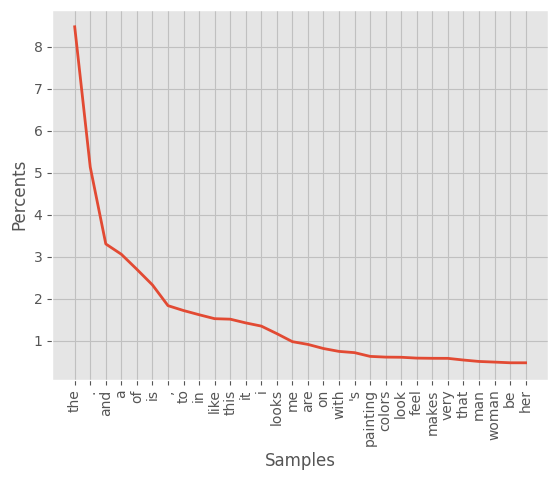

<Axes: xlabel='Samples', ylabel='Percents'>

In [31]:
tok_fq = FreqDist(list(chain(*art_df["tokens"].to_list())))
tok_fq.plot(30, percents=True)

#### Hapaxes

In [32]:
len(tok_fq.hapaxes())

28177

In [33]:
# How many of these can be typos?
# NOTE: Did not do this because it takes more than 5 minutes. I stopped it.
# pot_typos = [x for x in tok_fq.hapaxes() if x in words.words()]
# pot_typos

### Conclusions
- The rarity of words below the top ten might help in identifying sentiment
- There are emojis in the descriptions; but not too many :D

In [34]:
# Save the modified dataset
# art_df.drop(columns=["tokens"]).to_csv("../data/art_full.csv", index=False)